In [1]:
# Importing necessary libraries
# Supress Warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Data Reading

In [2]:
leads=pd.read_csv('Leads.csv')

### Inspecting the dataset

In [3]:
## Checking head of the dataset
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
print(leads.info())
print(leads.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

1. There are 9240 rows and 37 columns in the dataset and many categorical, integer and float variables
2. Also, We observe 'Converted' is the Target variable, which says whether customer would choose the course or not.
3. Using, Logisitc regression we would arrive at a lead score for every customer, which will parameter regarding Conversion rate of a customer

In [5]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Converting all Select to NAN
leads=leads.replace('Select',np.nan)


In [7]:
#Inspecting Unique Values in each Column.
leads.nunique().sort_values(ascending=True)

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [8]:
#Dropping columns with only 1 Unique Value as it is not useful for analysis
leads1=leads.drop(['Get updates on DM Content','I agree to pay the amount through cheque','Receive More Updates About Our Courses',
                 'Magazine','Update me on Supply Chain Content'],axis=1)

In [9]:
## calculating percentage of null values in columns
round(100*(leads1.isnull().sum()/len(leads1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

We see that there are many columns with high Null percentage and hence we will drop columns with more than 45% Null values

In [10]:
## Dropping columns with more than 45% Null values
NA_cols=leads1.columns
for i in NA_cols:
    if((100*(leads1[i].isnull().sum()/len(leads1.index))) >= 45):
        leads1.drop(i, 1, inplace = True)

In [11]:
## calculating percentage of null values in columns again
round(100*(leads1.isnull().sum()/len(leads1)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#dropping Lead Number and Prospect ID since they represent the same thing and is not required for our analysis along with score
#variable 'TAGS'

leads1.drop(['Prospect ID', 'Lead Number','Tags'],axis=1, inplace = True)

In [13]:
print(leads1.shape)

(9240, 22)


After removing intial non essential columns we are left with 9240 rows and 22 columns

In [14]:
## Displaying the remaining 22 columns
pd.set_option("display.max_columns",22)
leads1.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                      NaN   
1             Email Opened   India                      NaN   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                      NaN   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       Better Career Prospects     No                No   
1                       Better Career Prospects     No                No   
2                       Better Career Prospects     No                No   
3                       Better Career Prospects     No                No   
4                       Better Career Prospects     No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

     City A free copy of Mastering The Interview Last Notable Activity  
0     NaN                                     No              Modified  
1     NaN                                     No          Email Opened  
2  Mumbai                                    Yes          Email Opened  
3  Mumbai                                     No              Modified  
4  Mumbai                                     No              Modified

In [15]:
# Checking No of Unique Values in the columns again
leads1.nunique().sort_values(ascending=True)

Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
Newspaper Article                                   2
A free copy of Mastering The Interview              2
Search                                              2
What matters most to you in choosing a course       3
Lead Origin                                         5
City                                                6
What is your current occupation                     6
Last Notable Activity                              16
Last Activity                                      17
Specialization                                     18
Lead Source                                        21
Country                     

In [16]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

There are 9 Binary variables and 3 continous variables and rest 9 categorical variables and we will deal with them accordingly. We will map the binary variables accordingly and deal with categorical values one by one

Categorical columns are as follows:
    1. Lead Origin
    2. Lead source
    3. Last Activity
    4. Country
    5. Specialisation
    6. What is your current occupation
    7. What matters most to you in choosing a course
    8. City
    9. Last Notable Activity

## EDA

### Univariate Analysis- Categorical Columns

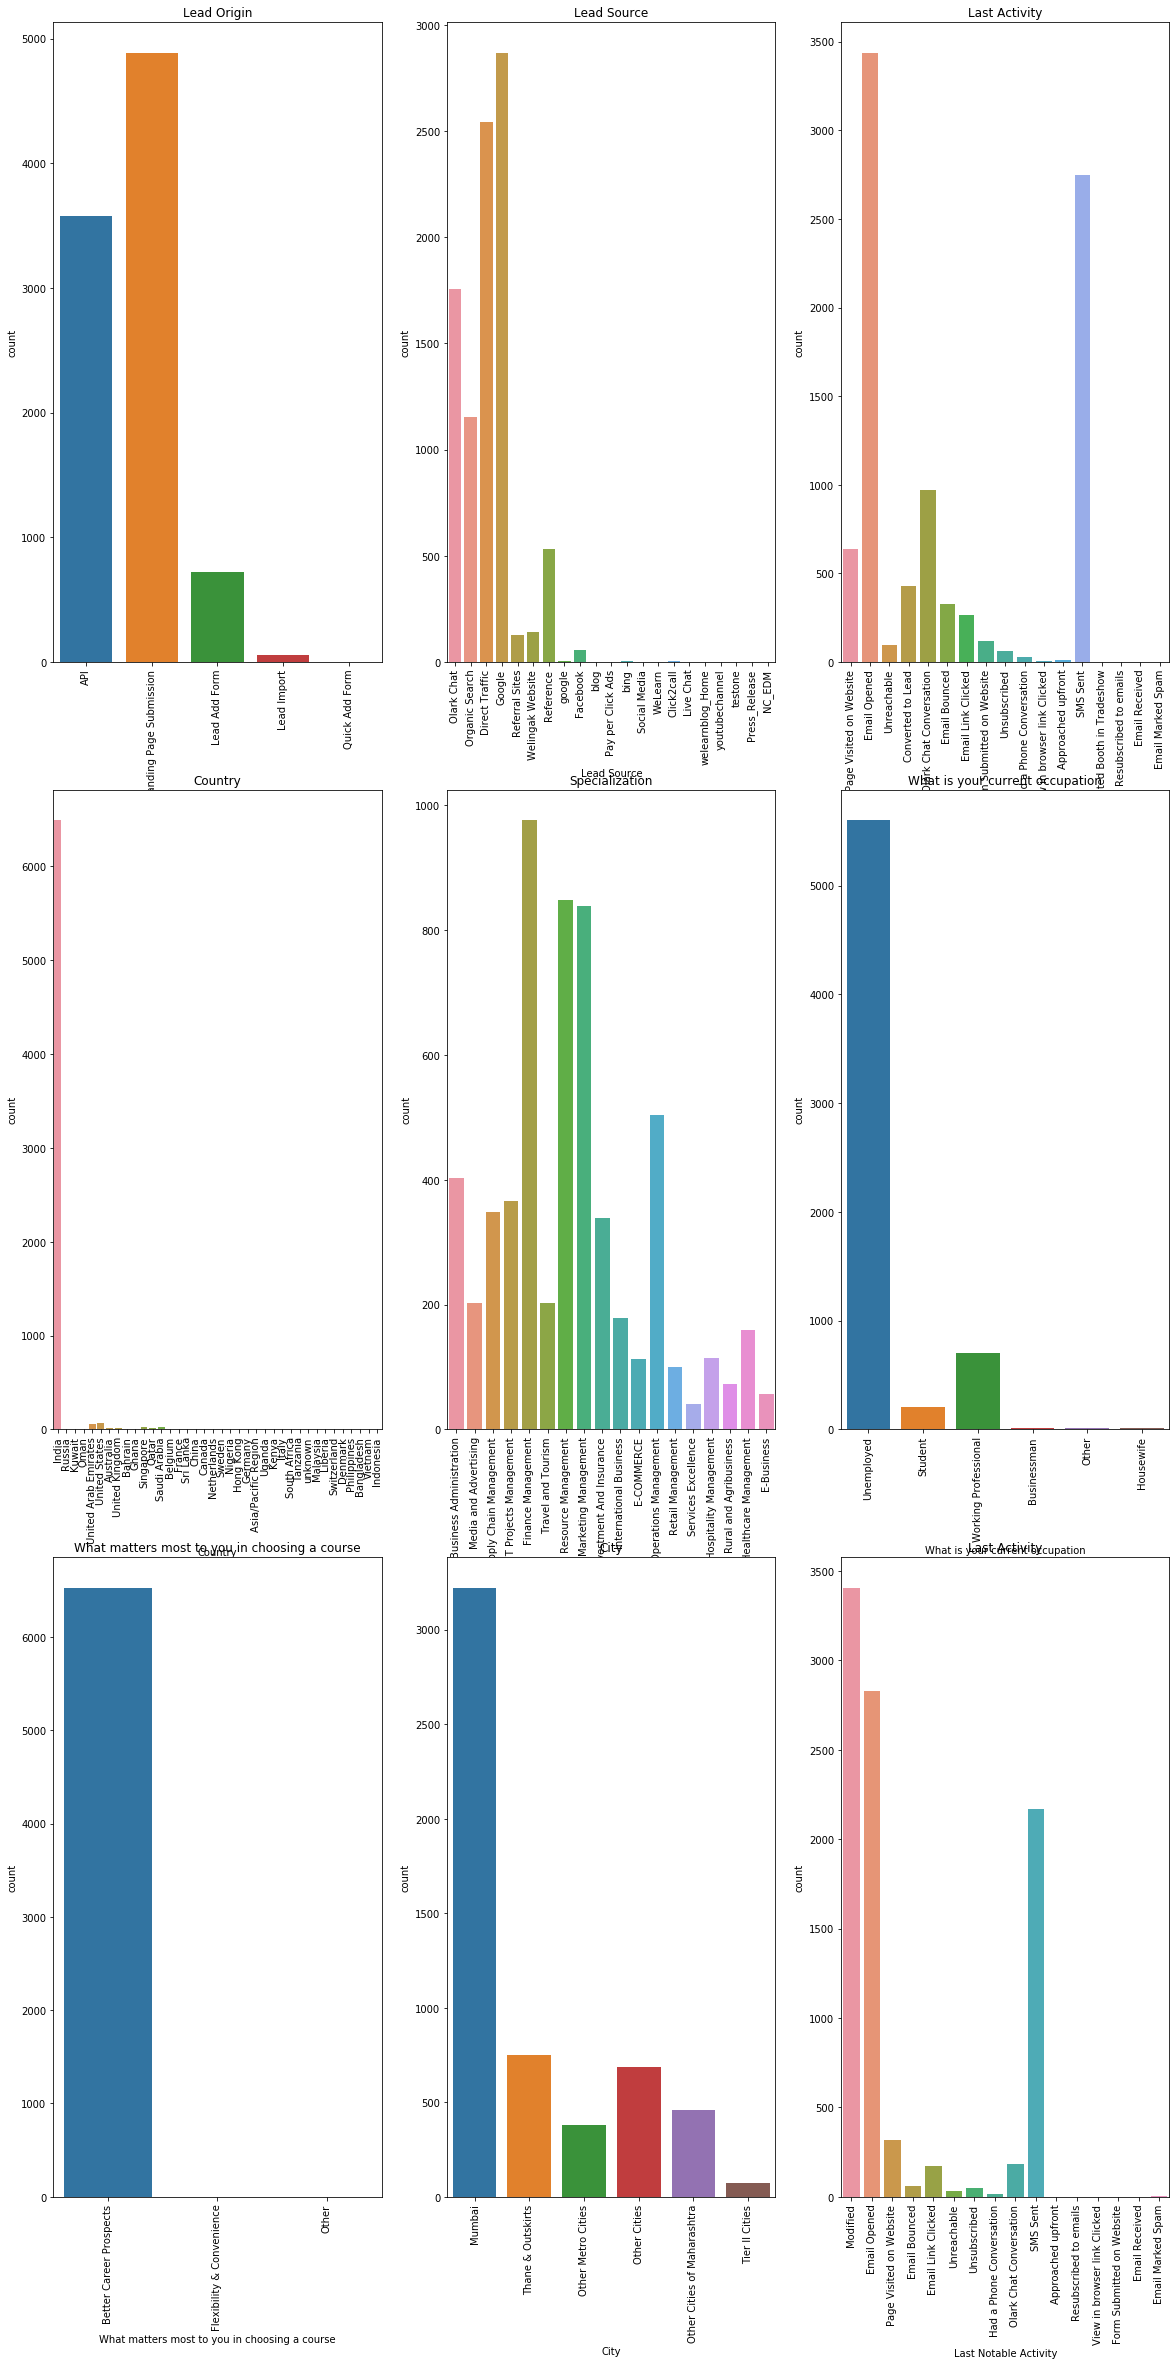

<Figure size 432x288 with 0 Axes>

In [17]:
#Plotting all Categorical Columns.

plt.figure(figsize = (20,40))

plt.subplot(3,3,1)
sns.countplot(leads1['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(3,3,2)
sns.countplot(leads1['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(3,3,3)
sns.countplot(leads1['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(3,3,4)
sns.countplot(leads1['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(3,3,5)
sns.countplot(leads1['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(3,3,6)
sns.countplot(leads1['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(3,3,7)
sns.countplot(leads1['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(3,3,8)
sns.countplot(leads1['City']).tick_params(axis='x', rotation = 90)
plt.title('City')

plt.subplot(3,3,9)
sns.countplot(leads1['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()
plt.tight_layout(pad=3.0)

From above we can see that some of the columns are skewed and there are also low value counts items present in the column. We will Deal with them one variable at a time.

In [18]:
leads1['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [19]:
leads1['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [20]:
# Merging Lead Import and Quick Add form in to others.
leads1['Lead Origin']=leads1['Lead Origin'].replace(['Lead Import','Quick Add Form'],'Lead_Origin_Others')

In [21]:
leads1['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
testone                 1
youtubechannel          1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [22]:
leads1['Lead Source'].value_counts(normalize=True,dropna=False)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Live Chat            0.000216
Social Media         0.000216
blog                 0.000108
NC_EDM               0.000108
WeLearn              0.000108
Pay per Click Ads    0.000108
testone              0.000108
youtubechannel       0.000108
welearnblog_Home     0.000108
Name: Lead Source, dtype: float64

Here, Null Value % is just 0.389, hence we impute it with Mode that is Google, which is around 31.5% (consdering both Google & google).
Also, converting low value items with Others

In [23]:
leads1['Lead Source'] = leads1['Lead Source'].replace([np.nan,'google'],'Google')
leads1['Lead Source'] = leads1['Lead Source'].replace(['bing','Click2call','Social Media','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Facebook'] ,'Lead_Source_Others')

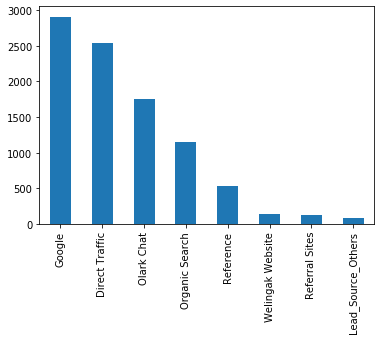

In [24]:
leads1['Lead Source'].value_counts().plot.bar()
plt.show()

Top three lead source is Google, Direct Traffic and Olark Chat

In [25]:
leads1['Lead Source'].value_counts(normalize=True)

Google                0.314827
Direct Traffic        0.275216
Olark Chat            0.189935
Organic Search        0.124892
Reference             0.057792
Welingak Website      0.015368
Referral Sites        0.013528
Lead_Source_Others    0.008442
Name: Lead Source, dtype: float64

Data in the column is not skewed hence we can use this column for Analysis

In [26]:
#Analysing Last Activity Column
leads1['Last Activity'].value_counts(normalize=True,dropna=False)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

Here, Null value % is 1.11% Hence Replacing Nan values with Mode 'Email Opened' and binning small values as Others

In [27]:
leads1['Last Activity']=leads1['Last Activity'].replace(np.nan,'Email Opened')
leads1['Last Activity'] = leads1['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Last_Activity_Others')

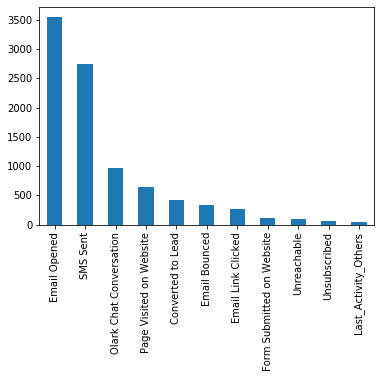

In [28]:
leads1['Last Activity'].value_counts().plot.bar()
plt.show()

We can say from the graph above that Email and sms is the most important means of communication beacuse these activty is performed most by the customers

In [29]:
leads1['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
Nigeria                 0.000433
Canada                  0.000433
Germany                 0.000433
South Africa            0.000433
Sweden                  0.000325
Uganda                  0.000216
Philippines             0.000216
China                   0.000216
Italy                   0.000216
Ghana                   0.000216
Belgium                 0.000216
Asia/Pacific Region     0.000216
Netherlands             0.000216
Bangladesh              0.000216
Switzerland             0.000108
Sri Lanka 

Most of the customers belong to India so we are replacing Nan values with India

In [30]:
leads1['Country']=leads1.Country.replace(np.nan,'India')

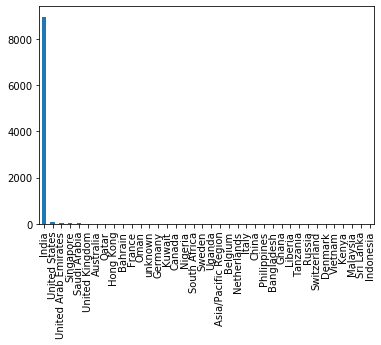

In [31]:
leads1['Country'].value_counts(dropna=False).plot.bar()

plt.show()

From above we can see that this column is skewed and hence not good for Analysis We should drop this column

In [32]:
leads1['Specialization'].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

Here we have most common category as Nan, as people have not selected any specialization we will replace it with "Not Provided'
and replace small value items with 'Others"

In [33]:
leads1['Specialization']=leads1.Specialization.replace(np.nan,'Not Provided')
leads1['Specialization']=leads1.Specialization.replace(['Travel and Tourism','Travel and Tourism','Media and Advertising','International Business'
                                                      'Healthcare Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business'
                                                       'Services Excellence'],'Specalization_Others')

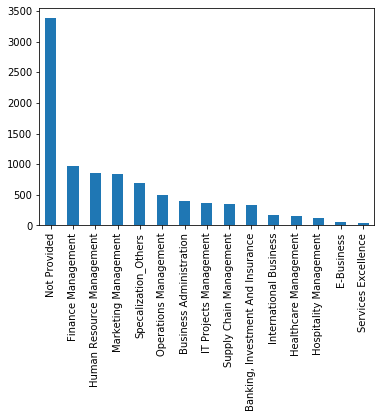

In [34]:
leads1['Specialization'].value_counts().plot.bar()
plt.show()

After 'Not Provided' category, 3 most frequent specialisation are Finance Management,Human Resource Management,Marketing management

In [35]:
leads1['Specialization'].value_counts(normalize=True)

Not Provided                         0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Specalization_Others                 0.074784
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [36]:
leads1['What is your current occupation'].value_counts(normalize=True,dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [37]:
## replacing Nan values with Not Mentioned
leads1['What is your current occupation'] = leads1['What is your current occupation'].replace(np.nan, 'Not Mentioned')

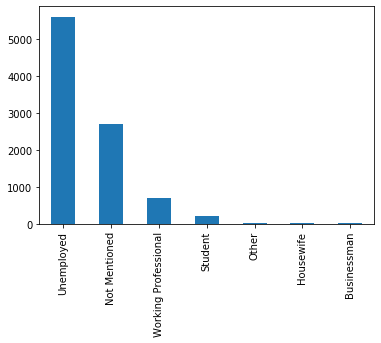

In [38]:
leads1['What is your current occupation'].value_counts().plot.bar()
plt.show()

Here we are not dropping this variable although it is mostly skewed in favor of Unemployed because unemployed customers is the most important target customer of X education.

In [39]:
leads1['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [40]:
## Here replacing Nan values and low value items as Others 
leads1['What matters most to you in choosing a course'] = leads1['What matters most to you in choosing a course'].replace([np.nan,'Flexibility & Convenience','Other'], 'Matters_Most_Others')

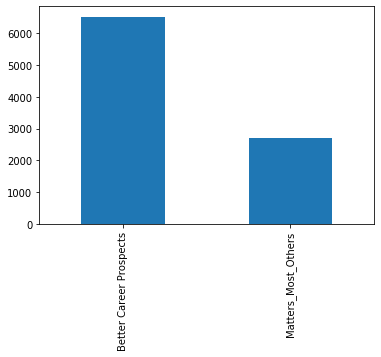

In [41]:
leads1['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()

Better career prospect is the most important driving factor to enroll for a course

In [42]:
# Analysing for City Column.
leads1['City'].value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [43]:
# Replacing Nan Values with Mumbai
leads1['City']=leads1['City'].replace(np.nan,'Mumbai')

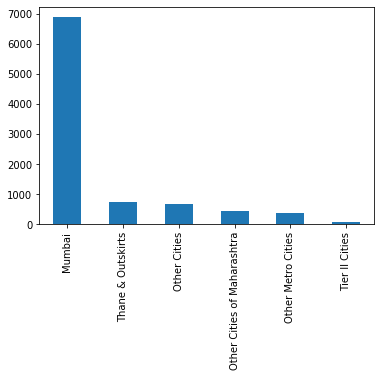

In [44]:
leads1['City'].value_counts().plot.bar()
plt.show()

Above column is skewed and hence we will not be using this column for analysis

In [45]:
# Analysing for Last Notable Activity Column.
leads1['Last Notable Activity'].value_counts(normalize=True,dropna=False)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Resubscribed to emails          0.000108
Email Received                  0.000108
View in browser link Clicked    0.000108
Approached upfront              0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

In [46]:
# Replacing Low Value counts with 'Others'
leads1['Last Notable Activity']=leads1['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam',
                                                                      'Resubscribed to emails','View in browser link Clicked','Email Received','Approached upfront',
                                                                      'Form Submitted on Website'],'Last_Notable_Act_Others')

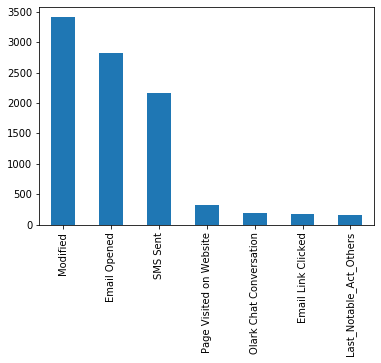

In [47]:
leads1['Last Notable Activity'].value_counts().plot.bar()
plt.show()

Modified, Email opened and SMS sent is the top 3 notable activity performed by the customers

### Analysing Binary Variables


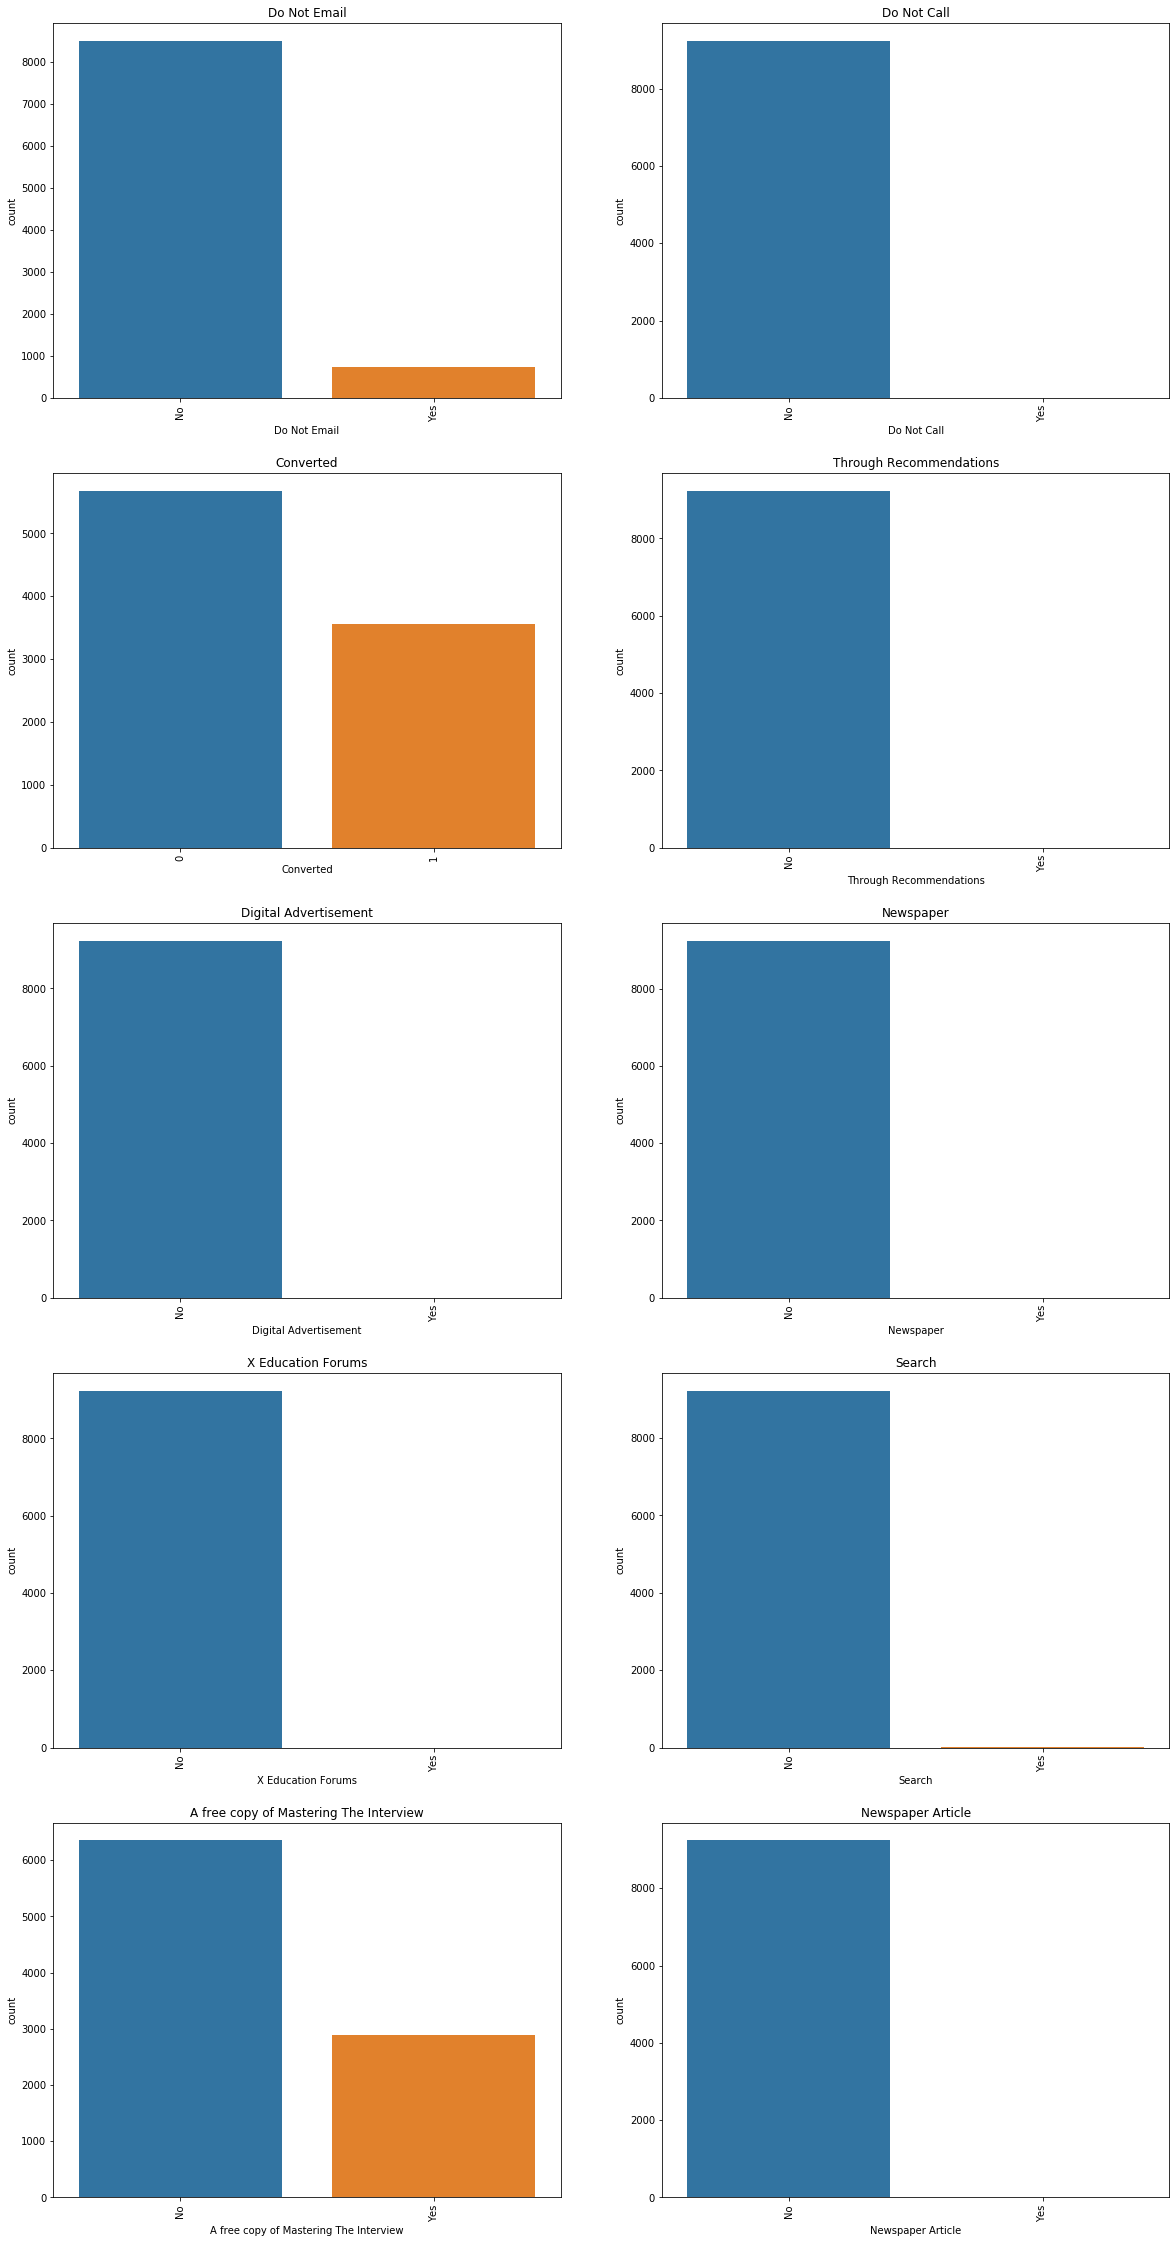

<Figure size 432x288 with 0 Axes>

In [48]:
#Plotting all Binary variables 

#Plotting all Categorical Columns.

plt.figure(figsize = (20,40))

plt.subplot(5,2,1)
sns.countplot(leads1['Do Not Email']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(5,2,2)
sns.countplot(leads1['Do Not Call']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(5,2,3)
sns.countplot(leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Converted')

plt.subplot(5,2,4)
sns.countplot(leads1['Through Recommendations']).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(5,2,5)
sns.countplot(leads1['Digital Advertisement']).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(5,2,6)
sns.countplot(leads1['Newspaper']).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(5,2,7)
sns.countplot(leads1['X Education Forums']).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(5,2,8)
sns.countplot(leads1['Search']).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(5,2,9)
sns.countplot(leads1['A free copy of Mastering The Interview']).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(5,2,10)
sns.countplot(leads1['Newspaper Article']).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.show()
plt.tight_layout(pad=3.0)

Here also, we see columns with lot of skewed data, So we look column by column to conclude which ones should be used for the analysis.

In [49]:
#Checking Value_counts for columns
leads1['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [50]:
leads1['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Since this column has mostly 'No' , we will drop this column from analysis.

In [51]:
leads1['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [52]:
leads1['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Since this column has Mostly 'No' it is skewed and we will drop this column as well.

In [53]:
leads1['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Since this column has Mostly 'No' it is skewed and we will drop this column as well.

In [54]:
leads1['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

Since this column has Mostly 'No' it is skewed and we will drop this column as well.

In [55]:
leads1['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

Since this column has Mostly 'No' it is skewed and we will drop this column as well.

In [56]:
leads1['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

Since this column has Mostly 'No' it is skewed and we will drop this column as well.

In [57]:
leads1['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [58]:
leads1['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

Since this column has Mostly 'No' it is skewed and we will drop this column as well.

In [59]:
#From above, we arrive at the columns that should be dropped which are as below :
Cols_to_drop=['City','Country','Do Not Call', 
       'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','Search']

In [60]:
leads1=leads1.drop(Cols_to_drop,axis=1)


In [61]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   What is your current occupation                9240 

In [62]:
#Checking Missing Values.
leads1.isnull().sum()/len(leads1)

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
A free copy of Mastering The Interview           0.000000
Last Notable Activity                            0.000000
dtype: float64

In [63]:
#Dropping rows with Null values as there are very few rows and it will not impact our analysis
leads1=leads1[leads1.isnull().sum(axis=1) <1]

#### No Of Rows Retained 

In [64]:
#Checking Percentage of Rows Retained.
round(100*(leads1.shape[0])/(leads.shape[0]),2)

98.52

Even after dropping rows with Null values we have retained 98.52% of rows

In [65]:
#Rechecking for Null Values in final dataset
leads1.isnull().sum()/len(leads1)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

From above we can see that we have removed all Null values in our dataset

###  Plotting Continous Variables. 

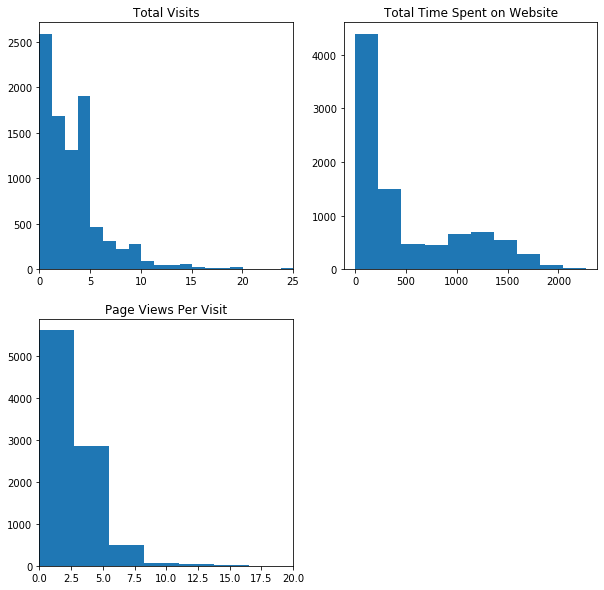

In [66]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(leads1['TotalVisits'],bins=200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads1['Total Time Spent on Website'],bins=10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads1['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

We now look at one by one column to analyze outliers and also correlation amongst variables

In [67]:
#Continous Variable Analysis
leads1['Converted'].value_counts(normalize=True)

0    0.619796
1    0.380204
Name: Converted, dtype: float64

38% of students have taken the course or lead is converted.

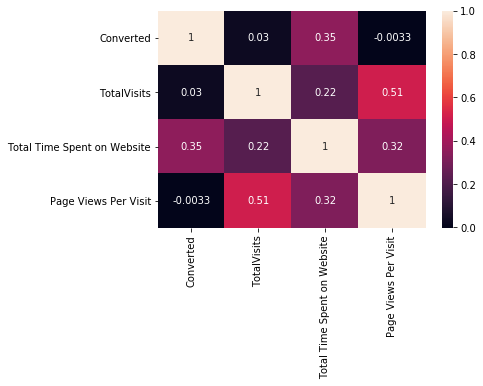

In [68]:
#Finding Correlation among Continous Variables.
sns.heatmap(leads1.corr(),annot=True)
plt.show()

From Above, Page view per visit has good correlation with Total Visits followed by  Total time spent on Website correlation with Converted.

## Outlier Treatment 

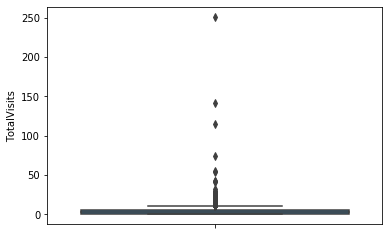

In [69]:
#TotalVisits variable
sns.boxplot(y=leads1['TotalVisits'])
plt.show()

From above, we can see that outliers are present in the column

In [70]:
leads1[['TotalVisits']].quantile([0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

TotalVisits
0.01          0.0
0.10          0.0
0.25          1.0
0.50          3.0
0.75          5.0
0.90          7.0
0.95         10.0
0.99         17.0
1.00        251.0

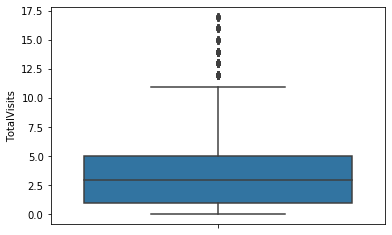

In [71]:
#From above we see that there is huge difference between 0.99 & max value.
#Hence we will remove the same.

Q3 = leads1.TotalVisits.quantile(0.99)
leads1 = leads1[(leads.TotalVisits <= Q3)]
Q1 = leads1.TotalVisits.quantile(0.01)
leads1 = leads1[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads1['TotalVisits'])
plt.show()

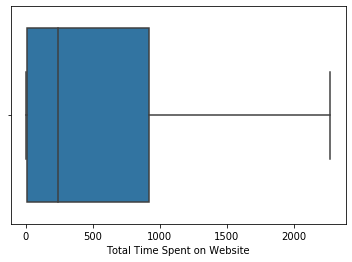

In [72]:
#Checking Variable Total time spent on website
sns.boxplot(leads1['Total Time Spent on Website'])
plt.show()

No major outliers are present

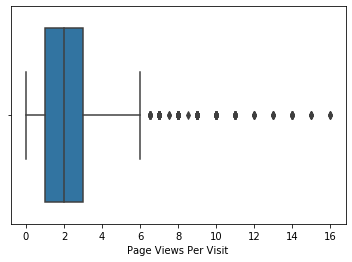

In [73]:
#Checking Variable Page Views per visit.
sns.boxplot(leads1['Page Views Per Visit'])
plt.show()

In [74]:
#We can observe that outliers are present in the column
leads1[['Page Views Per Visit']].quantile([0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

Page Views Per Visit
0.01                   0.0
0.10                   0.0
0.25                   1.0
0.50                   2.0
0.75                   3.0
0.90                   5.0
0.95                   6.0
0.99                   9.0
1.00                  16.0

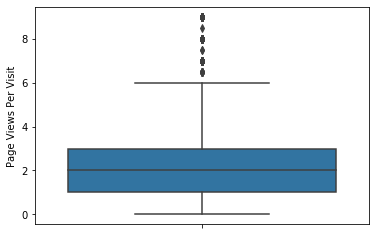

In [75]:
#From above we see that there is huge difference between 0.95 & 0.99 -max value.
#Hence we will remove the same.
Q3 = leads1['Page Views Per Visit'].quantile(0.99)
leads1 = leads1[leads1['Page Views Per Visit'] <= Q3]
Q1 = leads1['Page Views Per Visit'].quantile(0.01)
leads1 = leads1[leads1['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads1['Page Views Per Visit'])
plt.show()

### Bivariate Analysis - Categorical Variables.

We will do Bivariate Analysis for Categorical Variables with respect to target Variable Converted.

In [76]:
leads1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

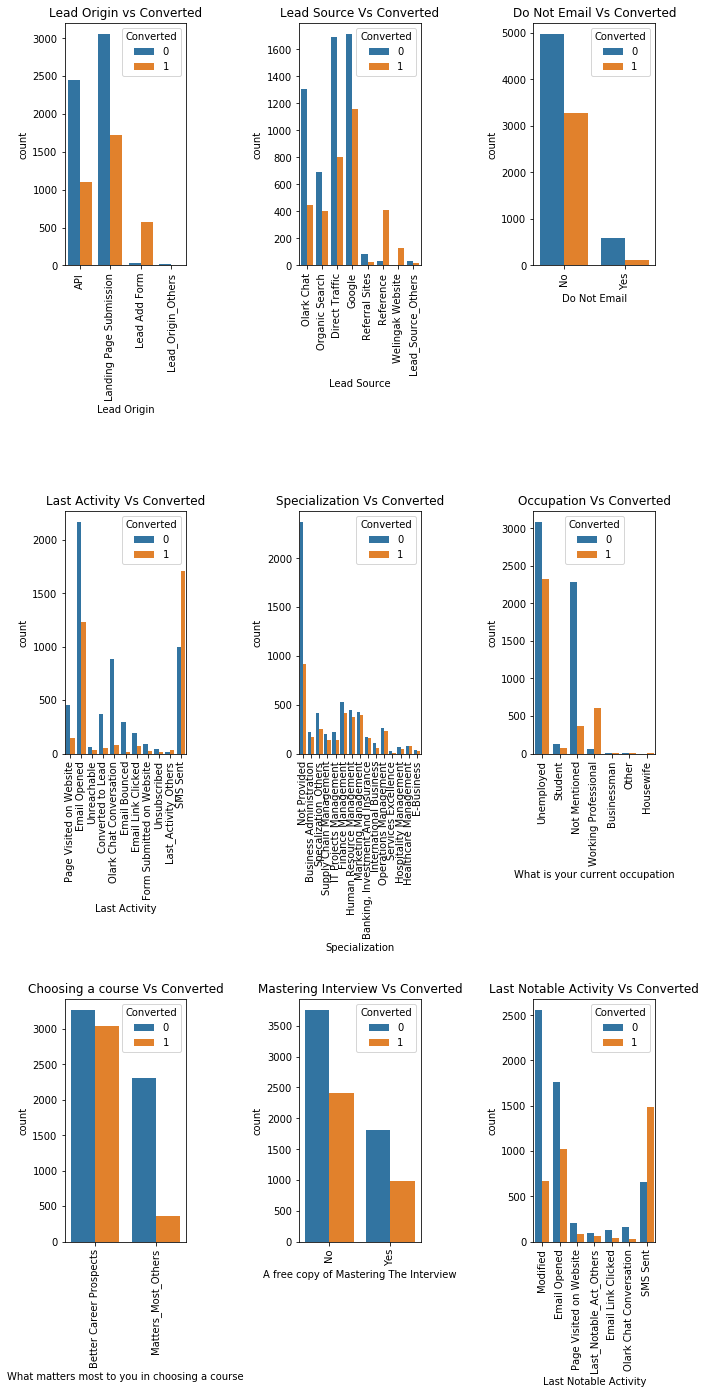

In [77]:

plt.figure(figsize = (10,20))

plt.subplot(3,3,1)
sns.countplot(leads1['Lead Origin'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin vs Converted')

plt.subplot(3,3,2)
sns.countplot(leads1['Lead Source'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source Vs Converted')

plt.subplot(3,3,3)
sns.countplot(leads1['Do Not Email'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email Vs Converted')

plt.subplot(3,3,4)
sns.countplot(leads1['Last Activity'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity Vs Converted')

plt.subplot(3,3,5)
sns.countplot(leads1['Specialization'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Specialization Vs Converted')

plt.subplot(3,3,6)
sns.countplot(leads1['What is your current occupation'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Occupation Vs Converted')

plt.subplot(3,3,7)
sns.countplot(leads1['What matters most to you in choosing a course'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Choosing a course Vs Converted')

plt.subplot(3,3,8)
sns.countplot(leads1['A free copy of Mastering The Interview'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Mastering Interview Vs Converted')

plt.subplot(3,3,9)
sns.countplot(leads1['Last Notable Activity'],hue=leads1['Converted']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity Vs Converted')


plt.tight_layout(pad=3.0)
plt.show()

Observations :
1. Lead Origin : Landing Page Submission has got most lead conversions as well as rejections.
2. Lead Source : Customers who has Google as their Lead Source has better chance of conversion.
3. Do Not Email : Customers who opt for No Email, has more count, and hence more rejections and conversions are there.
4. Last Activity : SMS Sent has the highest chance of lead converse, whilst Email Opened has the highest Lead non conversion.
5. Specalization : Customers who haven't provided info on this, have more chance of not enrolling to course.
6. Occupation : Unemployed has the most data in the column, hence it has more conversions and rejections as well. Also,Not   metioned client also have opted not to take the course.
7. What Matters in Choosing a course : For Better Carrer Prospects, has almost 50% of conversion.
8. Free Copy of Mastering Interview : If Client opt either Yes or No for this, for 30% of clients will opt for course.
9. Last Notable Activity :For SMS Sent, Most of clients will opt for Course whilst for Modified most of clients will not take up the course.

### Bivariate Analysis - Continous Variables.

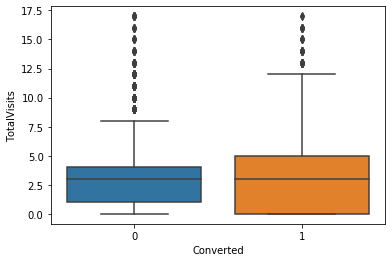

In [78]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads1)
plt.show()

 Median for Converted and not converted is close.However, if customer has total visits have above 4, there is a good chance that customer will enroll for course.


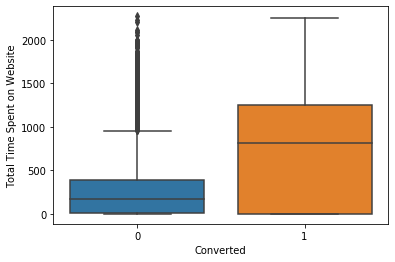

In [79]:
#Converted vs Total Time Spent on Website
sns.boxplot(x=leads1.Converted, y=leads1['Total Time Spent on Website'])
plt.show()

Time Spent on website is high for the Converted leads than Not converted. If time spent on website is above approximately 750 , then client should be followed up as conversion rate will be high.

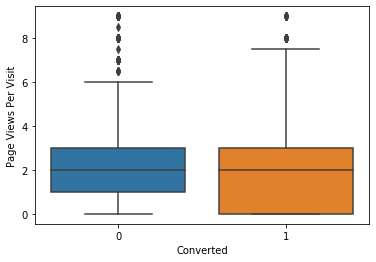

In [80]:
#Converted vs Page Views per Visit
sns.boxplot(x=leads1.Converted,y=leads1['Page Views Per Visit'])
plt.show()

Leads which are converted visits more pages per visit

Now, We have completed EDA, Univariate, Bivariate Analysis , Outlier Treatment, we head for Model Development. We start it with Dummy Variable Creation

## Dummy Variable Creation

In [81]:
#Dummy Variable Creation
#Categorical Columns.
Cater_col= leads1.select_dtypes(include=['object']).columns
Cater_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
leads1[Cater_col].nunique()

Lead Origin                                       4
Lead Source                                       8
Do Not Email                                      2
Last Activity                                    11
Specialization                                   15
What is your current occupation                   7
What matters most to you in choosing a course     2
A free copy of Mastering The Interview            2
Last Notable Activity                             7
dtype: int64

In [83]:
# Mapping binary variables

varlist =  ['A free copy of Mastering The Interview','Do Not Email']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads1[varlist] = leads1[varlist].apply(binary_map)

In [84]:
dummy=pd.get_dummies(leads1[['Lead Origin','Lead Source','What is your current occupation','Specialization','Last Activity',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

In [85]:
## Adding dummies to our dataset
leads1= pd.concat([leads1,dummy], axis = 1)


In [86]:
leads1.shape

(8953, 60)

In [87]:
#Dropping Original Columns.
leads1.drop(Cater_col,axis=1,inplace=True)

In [88]:

leads1.head()


Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead_Origin_Others  Lead Source_Google  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               0                   1   

   Lead Source_Lead_Source_Others  Lead Source_Olark Chat  \
0                               0                       1   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   Lead Source_Organic Search  ...  Last Activity_Page Visited on Website  \
0                           0  ...                                      1   
1                           1  ...                                      0   
2                           0  ...                                      0   
3                           0  ...                                      0   
4                           0  ...                                      0   

   Last Activity_SMS Sent  Last Activity_Unreachable  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          1   
4                       0                          0   

   Last Activity_Unsubscribed  \
0                           0   
1                           0   
2                           0   
3                           0   
4                           0   

   What matters most to you in choosing a course_Matters_Most_Others  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Last_Notable_Act_Others  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                         

### Test Train Splitting

In [89]:
#Train-Test Split & Logistic Regression Model Building:
from sklearn.model_selection import train_test_split
y = leads1['Converted']
X=leads1.drop('Converted', axis=1)

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 50 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   TotalVisits                                                        6267 non-null   float64
 1   Total Time Spent on Website                                        6267 non-null   int64  
 2   Page Views Per Visit                                               6267 non-null   float64
 3   Lead Origin_Landing Page Submission                                6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                                          6267 non-null   uint8  
 5   Lead Origin_Lead_Origin_Others                                     6267 non-null   uint8  
 6   Lead Source_Google                                                 6267 non-null   uint8  
 7   Lead Source_Lead_Sour

#### Scaling Data 

In [92]:
#Scaling The Data :

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9196     0.668862                     1.848117              1.455819   
4696    -0.030697                    -0.037832              0.399961   
3274     0.319082                    -0.642138             -0.127967   
2164    -0.380477                    -0.154676             -0.127967   
1667     0.319082                     1.258415             -0.481679   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
9196                                    1                          0   
4696                                    1                          0   
3274                                    1                          0   
2164                                    0                          0   
1667                                    0                          0   

      Lead Origin_Lead_Origin_Others  Lead Source_Google  \
9196                               0                   1   
4696                               0                   0   
3274                               0                   1   
2164                               0                   1   
1667                               0                   1   

      Lead Source_Lead_Source_Others  Lead Source_Olark Chat  \
9196                               0                       0   
4696                               0                       0   
3274                               0                       0   
2164                               0                       0   
1667                               0                       0   

      Lead Source_Organic Search  Lead Source_Reference  ...  \
9196                           0                      0  ...   
4696                           0                      0  ...   
3274                           0                      0  ...   
2164                           0                      0  ...   
1667                           0                      0  ...   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
9196                                      0                       1   
4696                                      0                       1   
3274                                      0                       1   
2164                                      0                       0   
1667                                      0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
9196                          0                           0   
4696                          0                           0   
3274                          0                           0   
2164                          0                           0   
1667                          0                           0   

      What matters most to you in choosing a course_Matters_Most_Others  \
9196                                                  0                   
4696                                                  0                   
3274                                                  1                   
2164                                                  0                   
1667                                                  0                   

      Last Notable Activity_Email Opened  \
9196                                   0   
4696                                   0   
3274                                   0   
2164                                   0   
1667                                   1   

      Last Notable Activity_Last_Notable_Act_Others  \
9196                                              0   
4696                                              0   
3274                                              0   
2164                                              0   
1667                                              0   

      Last Notable Activity_Modified  \
9196                               0   
4696                               0   
3274                               0

### Model Building

In [93]:
#Model Building using Stats Model & RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [94]:
#Importing RFE and choosing 20 vars 
from sklearn.feature_selection import RFE
rfe = RFE(LR, 20)          
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead_Origin_Others', False, 13),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Lead_Source_Others', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Not Mentioned', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-Business', False, 22),
 ('Specia

In [96]:
## columns selected after RFE
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Mentioned',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Not Provided', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Last_Activity_Others',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What matters most to you in choosing a course_Matters_Most_Others',
       'Last Notable Activity_Last_Notable_Act_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Building model using statsmodel for detailed analysis

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.4
Date:                Mon, 07 Sep 2020   Deviance:                       4972.7
Time:                        11:56:07   Pearson chi2:                 6.15e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -0.7535      0.278     -2.707      0.007      -1.299      -0.208
Total Time Spent on Website                                           1.0685      0.041     26.181      0.000       0.988       1.148
Lead Origin_Landing Page Submission                                  -1.0583      0.131     -8.078      0.000      -1.315      -0.801
Lead Origin_Lead Add Form                                             3.2658      0.255     12.823      0.000       2.767       3.765
Lead Source_Olark Chat                                                1.0850      0.124      8.733      0.000       0.841       1.328
Lead Source_Welingak Website                                          2.7219      1.039      2.620      0.009       0.686       4.758
What is your current occupation_Housewife                            22.8922   1.72e+04      0.001      0.999   -3.37e+04    3.38e+04
What is your current occupation_Not Mentioned                         0.0437      1.220      0.036      0.971      -2.348       2.436
What is your current occupation_Other                                -0.4843      0.774     -0.625      0.532      -2.002       1.034
What is your current occupation_Unemployed                           -0.0745      0.239     -0.311      0.756      -0.544       0.395
What is your current occupation_Working Professional                  2.3249      0.307      7.564      0.000       1.722       2.927
Specialization_Not Provided                                          -0.9278      0.127     -7.288      0.000      -1.177      -0.678
Last Activity_Email Bounced                                          -2.0183      0.418     -4.826      0.000      -2.838      -1.199
Last Activity_Email Opened                                            0.7664      0.112      6.863      0.000       0.548       0.985
Last Activity_Last_Activity_Others                                    2.1525      0.601      3.579      0.000       0.974       3.331
Last Activity_Olark Chat Conversation                                -0.8754      0.198     -4.422      0.000      -1.263      -0.487
Last Activity_SMS Sent                                                0.9915      0.171      5.808      0.000       0.657       1.326
Last Activity_Unsubscribed                                           -1.8976      0.593     -3.202      0.001      -3.059      -0.736
What matters most to you in choosing a course_Matters_Most_Others    -1.2157      1.207     -1.007      0.314      -3.581       1.150
Last Notable Activity_Last_Notable_Act_Others                         2.2538      0.391      5.763      0.000       1.487       3.020
L

There are 5 variables which have high P Value but 1 variable has p value of 0.999 we will remove it.

In [98]:
col=col.drop('What is your current occupation_Housewife')

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.2
Date:                Mon, 07 Sep 2020   Deviance:                       4980.3
Time:                        11:56:07   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -0.6439      0.273     -2.358      0.018      -1.179      -0.109
Total Time Spent on Website                                           1.0669      0.041     26.172      0.000       0.987       1.147
Lead Origin_Landing Page Submission                                  -1.0579      0.131     -8.086      0.000      -1.314      -0.801
Lead Origin_Lead Add Form                                             3.2680      0.255     12.839      0.000       2.769       3.767
Lead Source_Olark Chat                                                1.0811      0.124      8.706      0.000       0.838       1.324
Lead Source_Welingak Website                                          2.7193      1.039      2.618      0.009       0.683       4.756
What is your current occupation_Not Mentioned                        -0.0314      1.216     -0.026      0.979      -2.414       2.351
What is your current occupation_Other                                -0.5884      0.773     -0.762      0.446      -2.103       0.926
What is your current occupation_Unemployed                           -0.1783      0.234     -0.763      0.446      -0.637       0.280
What is your current occupation_Working Professional                  2.2197      0.303      7.329      0.000       1.626       2.813
Specialization_Not Provided                                          -0.9305      0.127     -7.316      0.000      -1.180      -0.681
Last Activity_Email Bounced                                          -2.0221      0.418     -4.840      0.000      -2.841      -1.203
Last Activity_Email Opened                                            0.7621      0.111      6.839      0.000       0.544       0.981
Last Activity_Last_Activity_Others                                    2.1510      0.601      3.577      0.000       0.972       3.330
Last Activity_Olark Chat Conversation                                -0.8837      0.198     -4.467      0.000      -1.272      -0.496
Last Activity_SMS Sent                                                0.9866      0.171      5.785      0.000       0.652       1.321
Last Activity_Unsubscribed                                           -1.8999      0.593     -3.206      0.001      -3.061      -0.739
What matters most to you in choosing a course_Matters_Most_Others    -1.2431      1.203     -1.033      0.302      -3.601       1.115
Last Notable Activity_Last_Notable_Act_Others                         2.2515      0.391      5.760      0.000       1.485       3.018
Last Notable Activity_SMS Sent                                        1.1010      0.155      7.093      0.000       0.797       1.405
=

There are Still 4 columns with high p value, we will have a look at VIF and then remove the vars

In [100]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
16  What matters most to you in choosing a course_...  179.74
5       What is your current occupation_Not Mentioned  175.59
7          What is your current occupation_Unemployed    8.19
14                             Last Activity_SMS Sent    6.78
1                 Lead Origin_Landing Page Submission    6.04
18                     Last Notable Activity_SMS Sent    5.11
9                         Specialization_Not Provided    4.24
11                         Last Activity_Email Opened    3.15
3                              Lead Source_Olark Chat    2.36
13              Last Activity_Olark Chat Conversation    1.95
2                           Lead Origin_Lead Add Form    1.93
8   What is your current occupation_Working Profes...    1.82
17      Last Notable Activity_Last_Notable_Act_Others    1.52
4                        Lead Source_Welingak Website    1.36
15                         Last Activity_Unsubscribed    1.33
0                         Total Time Spent on Website    1.33
10                        Last Activity_Email Bounced    1.29
12                 Last Activity_Last_Activity_Others    1.11
6               What is your current occupation_Other    1.01

VIF is very high for the varibles, We have to drop "What is your current occupation_Not Mentioned", since it has very high p value

In [101]:
col=col.drop('What is your current occupation_Not Mentioned')

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.2
Date:                Mon, 07 Sep 2020   Deviance:                       4980.3
Time:                        11:56:08   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -0.6447      0.271     -2.380      0.017      -1.176      -0.114
Total Time Spent on Website                                           1.0669      0.041     26.173      0.000       0.987       1.147
Lead Origin_Landing Page Submission                                  -1.0578      0.131     -8.092      0.000      -1.314      -0.802
Lead Origin_Lead Add Form                                             3.2680      0.255     12.840      0.000       2.769       3.767
Lead Source_Olark Chat                                                1.0811      0.124      8.707      0.000       0.838       1.325
Lead Source_Welingak Website                                          2.7193      1.039      2.618      0.009       0.683       4.755
What is your current occupation_Other                                -0.5875      0.772     -0.761      0.447      -2.101       0.925
What is your current occupation_Unemployed                           -0.1775      0.232     -0.766      0.444      -0.632       0.277
What is your current occupation_Working Professional                  2.2208      0.300      7.413      0.000       1.634       2.808
Specialization_Not Provided                                          -0.9303      0.127     -7.322      0.000      -1.179      -0.681
Last Activity_Email Bounced                                          -2.0221      0.418     -4.840      0.000      -2.841      -1.203
Last Activity_Email Opened                                            0.7620      0.111      6.841      0.000       0.544       0.980
Last Activity_Last_Activity_Others                                    2.1534      0.594      3.624      0.000       0.989       3.318
Last Activity_Olark Chat Conversation                                -0.8838      0.198     -4.468      0.000      -1.272      -0.496
Last Activity_SMS Sent                                                0.9865      0.170      5.787      0.000       0.652       1.321
Last Activity_Unsubscribed                                           -1.8997      0.593     -3.206      0.001      -3.061      -0.738
What matters most to you in choosing a course_Matters_Most_Others    -1.2736      0.241     -5.291      0.000      -1.745      -0.802
Last Notable Activity_Last_Notable_Act_Others                         2.2512      0.391      5.761      0.000       1.485       3.017
Last Notable Activity_SMS Sent                                        1.1010      0.155      7.093      0.000       0.797       1.405
=====================================================================================================================================
"

No we have two variables with almost same P value, we will look at VIF to decide which variable to remove

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6          What is your current occupation_Unemployed  8.19
13                             Last Activity_SMS Sent  6.77
1                 Lead Origin_Landing Page Submission  6.03
17                     Last Notable Activity_SMS Sent  5.11
15  What matters most to you in choosing a course_...  5.00
8                         Specialization_Not Provided  4.23
10                         Last Activity_Email Opened  3.14
3                              Lead Source_Olark Chat  2.36
12              Last Activity_Olark Chat Conversation  1.94
2                           Lead Origin_Lead Add Form  1.93
7   What is your current occupation_Working Profes...  1.82
16      Last Notable Activity_Last_Notable_Act_Others  1.51
4                        Lead Source_Welingak Website  1.36
14                         Last Activity_Unsubscribed  1.33
0                         Total Time Spent on Website  1.33
9                         Last Activity_Email Bounced  1.29
11                 Last Activity_Last_Activity_Others  1.10
5               What is your current occupation_Other  1.01

Since, What is your current occupation_Not Mentioned has Higher VIF, and very similar P value(0.444) to What is your current occupation_Other(0.447)  we will drop that first.

In [104]:
#Removing What is your current occupation_Unemployed column
col=col.drop("What is your current occupation_Unemployed")

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.5
Date:                Mon, 07 Sep 2020   Deviance:                       4980.9
Time:                        11:56:09   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -0.8172      0.151     -5.428      0.000      -1.112      -0.522
Total Time Spent on Website                                           1.0668      0.041     26.168      0.000       0.987       1.147
Lead Origin_Landing Page Submission                                  -1.0569      0.131     -8.086      0.000      -1.313      -0.801
Lead Origin_Lead Add Form                                             3.2729      0.254     12.864      0.000       2.774       3.772
Lead Source_Olark Chat                                                1.0841      0.124      8.733      0.000       0.841       1.327
Lead Source_Welingak Website                                          2.7106      1.039      2.609      0.009       0.675       4.747
What is your current occupation_Other                                -0.4171      0.739     -0.564      0.573      -1.866       1.032
What is your current occupation_Working Professional                  2.3905      0.202     11.851      0.000       1.995       2.786
Specialization_Not Provided                                          -0.9307      0.127     -7.324      0.000      -1.180      -0.682
Last Activity_Email Bounced                                          -2.0220      0.418     -4.838      0.000      -2.841      -1.203
Last Activity_Email Opened                                            0.7631      0.111      6.851      0.000       0.545       0.981
Last Activity_Last_Activity_Others                                    2.1352      0.592      3.606      0.000       0.975       3.296
Last Activity_Olark Chat Conversation                                -0.8779      0.198     -4.441      0.000      -1.265      -0.490
Last Activity_SMS Sent                                                0.9829      0.170      5.767      0.000       0.649       1.317
Last Activity_Unsubscribed                                           -1.9018      0.593     -3.209      0.001      -3.063      -0.740
What matters most to you in choosing a course_Matters_Most_Others    -1.1024      0.090    -12.274      0.000      -1.278      -0.926
Last Notable Activity_Last_Notable_Act_Others                         2.2484      0.391      5.754      0.000       1.483       3.014
Last Notable Activity_SMS Sent                                        1.1020      0.155      7.098      0.000       0.798       1.406
=====================================================================================================================================
"""

In [106]:
#Dropping column What is your current occupation_Other
col=col.drop("What is your current occupation_Other")

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.6
Date:                Mon, 07 Sep 2020   Deviance:                       4981.2
Time:                        11:56:09   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -0.8217      0.150     -5.465      0.000      -1.116      -0.527
Total Time Spent on Website                                           1.0660      0.041     26.169      0.000       0.986       1.146
Lead Origin_Landing Page Submission                                  -1.0540      0.131     -8.071      0.000      -1.310      -0.798
Lead Origin_Lead Add Form                                             3.2744      0.254     12.870      0.000       2.776       3.773
Lead Source_Olark Chat                                                1.0835      0.124      8.730      0.000       0.840       1.327
Lead Source_Welingak Website                                          2.7090      1.039      2.608      0.009       0.673       4.745
What is your current occupation_Working Professional                  2.3920      0.202     11.860      0.000       1.997       2.787
Specialization_Not Provided                                          -0.9271      0.127     -7.306      0.000      -1.176      -0.678
Last Activity_Email Bounced                                          -2.0209      0.418     -4.835      0.000      -2.840      -1.202
Last Activity_Email Opened                                            0.7633      0.111      6.853      0.000       0.545       0.982
Last Activity_Last_Activity_Others                                    2.1359      0.592      3.608      0.000       0.976       3.296
Last Activity_Olark Chat Conversation                                -0.8789      0.198     -4.446      0.000      -1.266      -0.491
Last Activity_SMS Sent                                                0.9844      0.170      5.777      0.000       0.650       1.318
Last Activity_Unsubscribed                                           -1.9007      0.592     -3.208      0.001      -3.062      -0.739
What matters most to you in choosing a course_Matters_Most_Others    -1.1012      0.090    -12.265      0.000      -1.277      -0.925
Last Notable Activity_Last_Notable_Act_Others                         2.2490      0.391      5.756      0.000       1.483       3.015
Last Notable Activity_SMS Sent                                        1.1019      0.155      7.099      0.000       0.798       1.406
=====================================================================================================================================
"""

All columns have acceptable p value, we will look at VIF.

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                             Last Activity_SMS Sent  6.31
15                     Last Notable Activity_SMS Sent  5.11
1                 Lead Origin_Landing Page Submission  2.98
6                         Specialization_Not Provided  2.84
8                          Last Activity_Email Opened  2.56
3                              Lead Source_Olark Chat  2.25
10              Last Activity_Olark Chat Conversation  1.83
2                           Lead Origin_Lead Add Form  1.72
13  What matters most to you in choosing a course_...  1.68
14      Last Notable Activity_Last_Notable_Act_Others  1.50
4                        Lead Source_Welingak Website  1.35
12                         Last Activity_Unsubscribed  1.32
0                         Total Time Spent on Website  1.31
7                         Last Activity_Email Bounced  1.27
5   What is your current occupation_Working Profes...  1.20
9                  Last Activity_Last_Activity_Others  1.10

In [109]:
#Removing "Last Activity_SMS Sent" Column as it has a very high VIF
col=col.drop("Last Activity_SMS Sent")

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.0
Date:                Mon, 07 Sep 2020   Deviance:                       5014.0
Time:                        11:56:09   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -0.5423      0.140     -3.884      0.000      -0.816      -0.269
Total Time Spent on Website                                           1.0676      0.041     26.325      0.000       0.988       1.147
Lead Origin_Landing Page Submission                                  -1.0499      0.130     -8.080      0.000      -1.305      -0.795
Lead Origin_Lead Add Form                                             3.3437      0.255     13.126      0.000       2.844       3.843
Lead Source_Olark Chat                                                1.0859      0.124      8.781      0.000       0.844       1.328
Lead Source_Welingak Website                                          2.7663      1.039      2.664      0.008       0.731       4.802
What is your current occupation_Working Professional                  2.3696      0.201     11.814      0.000       1.976       2.763
Specialization_Not Provided                                          -0.9204      0.126     -7.289      0.000      -1.168      -0.673
Last Activity_Email Bounced                                          -2.2045      0.408     -5.409      0.000      -3.003      -1.406
Last Activity_Email Opened                                            0.4708      0.095      4.936      0.000       0.284       0.658
Last Activity_Last_Activity_Others                                    1.8756      0.586      3.199      0.001       0.726       3.025
Last Activity_Olark Chat Conversation                                -1.1749      0.189     -6.219      0.000      -1.545      -0.805
Last Activity_Unsubscribed                                           -2.0371      0.589     -3.460      0.001      -3.191      -0.883
What matters most to you in choosing a course_Matters_Most_Others    -1.0693      0.089    -11.968      0.000      -1.244      -0.894
Last Notable Activity_Last_Notable_Act_Others                         2.0773      0.385      5.392      0.000       1.322       2.832
Last Notable Activity_SMS Sent                                        1.7950      0.104     17.280      0.000       1.591       1.999
=====================================================================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                         Specialization_Not Provided  2.66
1                 Lead Origin_Landing Page Submission  2.57
8                          Last Activity_Email Opened  2.25
3                              Lead Source_Olark Chat  2.23
14                     Last Notable Activity_SMS Sent  1.94
10              Last Activity_Olark Chat Conversation  1.72
2                           Lead Origin_Lead Add Form  1.66
12  What matters most to you in choosing a course_...  1.66
13      Last Notable Activity_Last_Notable_Act_Others  1.50
4                        Lead Source_Welingak Website  1.35
11                         Last Activity_Unsubscribed  1.32
0                         Total Time Spent on Website  1.31
7                         Last Activity_Email Bounced  1.24
5   What is your current occupation_Working Profes...  1.19
9                  Last Activity_Last_Activity_Others  1.09

In [112]:
#Dropping Specialization_Not Provided Column
col=col.drop("Specialization_Not Provided")

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.1
Date:                Mon, 07 Sep 2020   Deviance:                       5068.2
Time:                        11:56:10   Pearson chi2:                 6.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -1.2117      0.105    -11.514      0.000      -1.418      -1.005
Total Time Spent on Website                                           1.0876      0.040     26.951      0.000       1.009       1.167
Lead Origin_Landing Page Submission                                  -0.3772      0.090     -4.201      0.000      -0.553      -0.201
Lead Origin_Lead Add Form                                             3.6598      0.251     14.606      0.000       3.169       4.151
Lead Source_Olark Chat                                                1.0583      0.121      8.745      0.000       0.821       1.296
Lead Source_Welingak Website                                          2.3100      1.036      2.230      0.026       0.280       4.340
What is your current occupation_Working Professional                  2.4618      0.197     12.520      0.000       2.076       2.847
Last Activity_Email Bounced                                          -2.3283      0.412     -5.653      0.000      -3.136      -1.521
Last Activity_Email Opened                                            0.4639      0.095      4.898      0.000       0.278       0.649
Last Activity_Last_Activity_Others                                    1.7931      0.579      3.099      0.002       0.659       2.927
Last Activity_Olark Chat Conversation                                -1.2159      0.186     -6.544      0.000      -1.580      -0.852
Last Activity_Unsubscribed                                           -2.0502      0.582     -3.522      0.000      -3.191      -0.909
What matters most to you in choosing a course_Matters_Most_Others    -1.1604      0.088    -13.135      0.000      -1.334      -0.987
Last Notable Activity_Last_Notable_Act_Others                         2.0831      0.384      5.425      0.000       1.331       2.836
Last Notable Activity_SMS Sent                                        1.7592      0.103     17.040      0.000       1.557       1.962
=====================================================================================================================================
"""

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                 Lead Origin_Landing Page Submission  2.20
3                              Lead Source_Olark Chat  2.06
7                          Last Activity_Email Opened  1.89
2                           Lead Origin_Lead Add Form  1.66
13                     Last Notable Activity_SMS Sent  1.66
9               Last Activity_Olark Chat Conversation  1.54
11  What matters most to you in choosing a course_...  1.51
12      Last Notable Activity_Last_Notable_Act_Others  1.50
4                        Lead Source_Welingak Website  1.32
10                         Last Activity_Unsubscribed  1.32
0                         Total Time Spent on Website  1.30
6                         Last Activity_Email Bounced  1.21
5   What is your current occupation_Working Profes...  1.18
8                  Last Activity_Last_Activity_Others  1.09

In [115]:
#Dropping Lead Origin_Landing Page Submission column
col=col.drop("Lead Origin_Landing Page Submission")

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.9
Date:                Mon, 07 Sep 2020   Deviance:                       5085.8
Time:                        11:56:11   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                                -1.4841      0.084    -17.635      0.000      -1.649      -1.319
Total Time Spent on Website                                           1.0868      0.040     26.972      0.000       1.008       1.166
Lead Origin_Lead Add Form                                             3.9363      0.242     16.248      0.000       3.461       4.411
Lead Source_Olark Chat                                                1.3210      0.105     12.582      0.000       1.115       1.527
Lead Source_Welingak Website                                          2.3050      1.036      2.226      0.026       0.275       4.335
What is your current occupation_Working Professional                  2.4358      0.196     12.416      0.000       2.051       2.820
Last Activity_Email Bounced                                          -2.3521      0.410     -5.730      0.000      -3.157      -1.548
Last Activity_Email Opened                                            0.4621      0.095      4.886      0.000       0.277       0.648
Last Activity_Last_Activity_Others                                    1.8012      0.578      3.118      0.002       0.669       2.933
Last Activity_Olark Chat Conversation                                -1.1540      0.185     -6.232      0.000      -1.517      -0.791
Last Activity_Unsubscribed                                           -2.0793      0.581     -3.577      0.000      -3.219      -0.940
What matters most to you in choosing a course_Matters_Most_Others    -1.1442      0.088    -13.007      0.000      -1.317      -0.972
Last Notable Activity_Last_Notable_Act_Others                         2.0950      0.383      5.473      0.000       1.345       2.845
Last Notable Activity_SMS Sent                                        1.7437      0.103     16.947      0.000       1.542       1.945
=====================================================================================================================================
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                              Lead Source_Olark Chat  1.80
1                           Lead Origin_Lead Add Form  1.57
11      Last Notable Activity_Last_Notable_Act_Others  1.50
8               Last Activity_Olark Chat Conversation  1.49
10  What matters most to you in choosing a course_...  1.43
3                        Lead Source_Welingak Website  1.32
6                          Last Activity_Email Opened  1.31
9                          Last Activity_Unsubscribed  1.31
0                         Total Time Spent on Website  1.30
12                     Last Notable Activity_SMS Sent  1.24
4   What is your current occupation_Working Profes...  1.17
5                         Last Activity_Email Bounced  1.14
7                  Last Activity_Last_Activity_Others  1.08

All columns have acceptable p value, and all good VIF Values.. All p values are less than 0.05, and VIF are less than 2
This will be our final Model. Our Final Model has 13 Variables

In [118]:
#Predicting Y Values:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.906199
4696    0.554397
3274    0.170443
2164    0.056992
1667    0.585561
7024    0.343242
8018    0.032011
778     0.034354
6942    0.094067
4440    0.074004
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90619904, 0.55439748, 0.17044309, 0.0569916 , 0.5855605 ,
       0.34324214, 0.03201073, 0.03435385, 0.0940669 , 0.07400443])

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          1        0.906199         9196
1          0        0.554397         4696
2          0        0.170443         3274
3          0        0.056992         2164
4          1        0.585561         1667

In [121]:
# We are considering if probablity above 50% then we are considering it as lead converted hence infering it as '1'
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          1        0.906199         9196          1
1          0        0.554397         4696          1
2          0        0.170443         3274          0
3          0        0.056992         2164          0
4          1        0.585561         1667          1

In [122]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3449  433]
 [ 734 1651]]


In [123]:
#Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8137865007180469


In [124]:
#Finding TP, FP,FN , TN to calculate other Metrics
 # true positive
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0] 

In [125]:
#Finding Sensitivity
TP/(TP+FN)

0.6922431865828093

In [126]:
#Finding Specificity
TN/(TN+FP)

0.8884595569294178

Here our model has accuracy of 81%, 69% sensitivity, and 88% Specificity, at 0.5% cut off. No we look for Optimal Cut off using ROC Curve

## Optimal Cut Off

In [127]:
#ROC CURVE:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

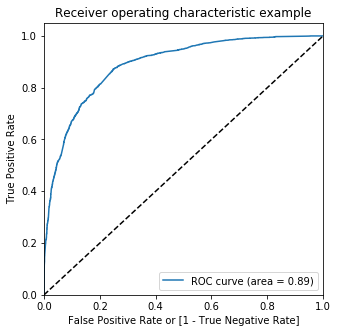

In [128]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC Curve the closer it is to top left corner i.e, area closer it is to 1, the better. Here Our ROC curve area is 0.89, Indicating a good model

## Finding Optimal Cutoff Point

Above we have choosen Probablity of 0.5 as cut off point, where we considered above 0.5 , lead will be Converted and regarded as Successful. Now, we try to find out the optimal probability where we can say lead will be converted.

In [129]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.906199         9196          1    1    1    1    1    1   
1          0        0.554397         4696          1    1    1    1    1    1   
2          0        0.170443         3274          0    1    1    0    0    0   
3          0        0.056992         2164          0    1    0    0    0    0   
4          1        0.585561         1667          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1  
1    1    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    0    0    0    0

In [130]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.628211  0.972746  0.416538
0.2   0.2  0.761130  0.909434  0.670015
0.3   0.3  0.797830  0.872537  0.751932
0.4   0.4  0.811712  0.769392  0.837713
0.5   0.5  0.813787  0.692243  0.888460
0.6   0.6  0.806766  0.622642  0.919887
0.7   0.7  0.784107  0.509434  0.952859
0.8   0.8  0.761928  0.421803  0.970891
0.9   0.9  0.714536  0.268344  0.988666


In [131]:
#Plotting Accuracy, Sensitivity & Specificity.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xlim(0.1,1)
plt.vlines(0.36,ymax=1,ymin=0,colors='blue',linestyle='--')
plt.show()

From above plot we consider 0.36 as the optimal Probablity

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          1        0.906199         9196          1    1    1    1    1    1   
1          0        0.554397         4696          1    1    1    1    1    1   
2          0        0.170443         3274          0    1    1    0    0    0   
3          0        0.056992         2164          0    1    0    0    0    0   
4          1        0.585561         1667          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1                1  
1    1    0    0    0    0                1  
2    0    0    0    0    0                0  
3    0    0    0    0    0                0  
4    1    0    0    0    0                1

### Lead Score

Now, we calculate Lead Score by Multiplying the Converted Probability with 100.

In [133]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_predicted  Lead_Score
0          1        0.906199         9196                1          91
1          0        0.554397         4696                1          55
2          0        0.170443         3274                0          17
3          0        0.056992         2164                0           6
4          1        0.585561         1667                1          59

In [134]:
conf2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf2

array([[3138,  744],
       [ 469, 1916]], dtype=int64)

In [135]:
#Finding TP, FP,FN , TN to calculate other Metrics
 # true positive
TP = conf2[1,1] 
# true negatives
TN = conf2[0,0] 
# false positives
FP = conf2[0,1] 
# false negatives
FN = conf2[1,0] 

In [136]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064464656135312

In [137]:
# Sensitivy
TP/(TP+FN)

0.8033542976939203

In [138]:
#Specificty
TN/(TN+FP)

0.8083462132921174

So, From the above, for train Data we have :
1. Accuracy : 80.64%
2. Sensitivity : 80.33%
3. Specificity : 80.83%

In [139]:
#Calculating False Positive Rate Means : Lead not converted but we predicted as Converted
FP/(TN+FP)

0.19165378670788252

In [140]:
#Positive Predictive Value 
TP/(TP+FP)

0.7203007518796992

In [141]:
#Negative Predictive Value :
TN/(TN+FN)

0.869975048516773

In [142]:
#Precision :
TP/(TP+FP)

0.7203007518796992

In [143]:
#Recall:
TP/(TP+FN)


0.8033542976939203

In [144]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7203007518796992

In [145]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8033542976939203

### Precision Recall Trade Off 

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlim(0.1,1)
plt.vlines(0.42,ymax=1,ymin=0,colors='blue',linestyle='--')
plt.show()

Here, Trade off between Precision and recall is 0.42 .Since we are trying to maximising sensitivity, we will go head with 0.36 as optimal cut off point.

### Making Predictions on test Data

In [149]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7681     0.575687                    -0.311318              0.092860   
984     -0.090676                    -0.550262              0.356568   
8135    -0.423857                     0.812462             -0.170849   
6915     0.242505                    -0.628665             -0.170849   
2712    -0.090676                    -0.421456              0.356568   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
7681                                    1                          0   
984                                     1                          0   
8135                                    1                          0   
6915                                    1                          0   
2712                                    0                          0   

      Lead Origin_Lead_Origin_Others  Lead Source_Google  \
7681                               0                   0   
984                                0                   0   
8135                               0                   0   
6915                               0                   1   
2712                               0                   1   

      Lead Source_Lead_Source_Others  Lead Source_Olark Chat  \
7681                               0                       0   
984                                0                       0   
8135                               0                       0   
6915                               0                       0   
2712                               0                       0   

      Lead Source_Organic Search  Lead Source_Reference  ...  \
7681                           0                      0  ...   
984                            1                      0  ...   
8135                           0                      0  ...   
6915                           0                      0  ...   
2712                           0                      0  ...   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
7681                                      0                       1   
984                                       0                       1   
8135                                      0                       1   
6915                                      0                       0   
2712                                      0                       0   

      Last Activity_Unreachable  Last Activity_Unsubscribed  \
7681                          0                           0   
984                           0                           0   
8135                          0                           0   
6915                          0                           0   
2712                          0                           0   

      What matters most to you in choosing a course_Matters_Most_Others  \
7681                                                  0                   
984                                                   0                   
8135                                                  1                   
6915                                                  0                   
2712                                                  0                   

      Last Notable Activity_Email Opened  \
7681                                   0   
984                                    0   
8135                                   0   
6915                                   1   
2712                                   1   

      Last Notable Activity_Last_Notable_Act_Others  \
7681                                              0   
984                                               0   
8135                                              0   
6915                                              0   
2712                                              0   

      Last Notable Activity_Modified  \
7681                               0   
984                                1   
8135                               0

In [150]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
7681                    -0.311318                          0   
984                     -0.550262                          0   
8135                     0.812462                          0   
6915                    -0.628665                          0   
2712                    -0.421456                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
7681                       0                             0   
984                        0                             0   
8135                       0                             0   
6915                       0                             0   
2712                       0                             0   

      What is your current occupation_Working Professional  \
7681                                                  0      
984                                                   0      
8135                                                  0      
6915                                                  0      
2712                                                  0      

      Last Activity_Email Bounced  Last Activity_Email Opened  \
7681                            0                           0   
984                             0                           0   
8135                            0                           0   
6915                            0                           1   
2712                            0                           1   

      Last Activity_Last_Activity_Others  \
7681                                   0   
984                                    0   
8135                                   0   
6915                                   0   
2712                                   0   

      Last Activity_Olark Chat Conversation  Last Activity_Unsubscribed  \
7681                                      0                           0   
984                                       0                           0   
8135                                      0                           0   
6915                                      0                           0   
2712                                      0                           0   

      What matters most to you in choosing a course_Matters_Most_Others  \
7681                                                  0                   
984                                                   0                   
8135                                                  1                   
6915                                                  0                   
2712                                                  0                   

      Last Notable Activity_Last_Notable_Act_Others  \
7681                                              0   
984                                               0   
8135                                              0   
6915                                              0   
2712                                              0   

      Last Notable Activity_SMS Sent  
7681                               1  
984                                0  
8135                               1  
6915                               0  
2712                               0

In [151]:
X_test_sm = sm.add_constant(X_test)

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

7681    0.480318
984     0.110847
8135    0.499589
6915    0.153785
2712    0.185424
244     0.634814
4698    0.086590
8287    0.031354
6791    0.424740
8970    0.141836
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_test_final = pd.DataFrame(y_test_pred)
y_pred_test_final.head()

0
7681  0.480318
984   0.110847
8135  0.499589
6915  0.153785
2712  0.185424

In [155]:
y_test_df = pd.DataFrame(y_test)

In [156]:
y_test_df['Prospect ID'] = y_test_df.index

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_test_final.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
y_pred_final=pd.concat([y_test_df,y_pred_test_final],axis=1)

In [159]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         7681  0.480318
1          0          984  0.110847
2          0         8135  0.499589
3          0         6915  0.153785
4          1         2712  0.185424

In [160]:
y_pred_final=y_pred_final.rename(columns={0:'Converted_prob'})
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         7681        0.480318
1          0          984        0.110847
2          0         8135        0.499589
3          0         6915        0.153785
4          1         2712        0.185424

In [161]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final=y_pred_final[['Prospect ID','Converted','Converted_prob','Lead_Score']]
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         7681          0        0.480318          48
1          984          0        0.110847          11
2         8135          0        0.499589          50
3         6915          0        0.153785          15
4         2712          1        0.185424          19

Since here we are trying to Maximize Sensitivity, we go with 0.36 as our optimal cut off that we got from Accurcay-Sensitivity-Specificity Curve

In [162]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         7681          0        0.480318          48                1
1          984          0        0.110847          11                0
2         8135          0        0.499589          50                1
3         6915          0        0.153785          15                0
4         2712          1        0.185424          19                0

In [163]:
#Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8075204765450484

In [164]:
conf3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
conf3

array([[1347,  329],
       [ 188,  822]], dtype=int64)

In [165]:
TP = conf3[1,1] 
TN = conf3[0,0] 
FP = conf3[0,1] 
FN = conf3[1,0]

In [166]:
# Sensitivy
TP/(TP+FN)

0.8138613861386138

In [167]:
#Specificty
TN/(TN+FP)

0.8036992840095465

So, our final model with 0.36 cut off has following metrics For Train Data and Test Data:
1. Accuracy : 80.64%
2. Sensitivity : 80.33%
3. Specificity : 80.83%

For test Data we have :

1. Accuracy : 80.75%
2. Sensitivity : 81.38%
3. Specificity : 80.37%

From the above, We can conclude that all the metrics are very good and also pretty similar for both train and test data.
So, We can concur that this is a very good model for prediction of conversion of the Student for taking up the course.

From the model, we can predict that Most Potential Buyers will have following criteria:
    
1. When Lead Origin is Lead Add Form
2. When Current occupation is "Working Professional"
3. When Lead_Source is Wellingak Website and Olark Chart
4. Last Activiy is SMS Sent
